# Dataset Exploration Notebook

In [165]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

Let's set up things for Colab and non-Colab (just in case...)

In [7]:
if colab := 'google_colab' in sys.modules:
    from google.colab import drive
    drive.mount("/content/drive")
    # in case we'll do a shared drive, this will have to be changed.
    # For now it is basically a placeholder
    BASE_PATH = "drive/MyDrive/HLT/ProjectAthena/"
    sys.path.insert(0,BASE_PATH)

    # in case some packets have to be installed,
    # here is where we do it
else:
    BASE_PATH = ".."

In [195]:
df = pd.read_csv(os.path.join(BASE_PATH,'philosophy_data.csv'))

## Dataset description

Let's start from the basics: how many texts in this dataset, from how many authors...

In [32]:
print(f'There are {len(df['title'].unique())} texts from {len(df['author'].unique())} authors, spanning {len(df['school'].unique())} schools of thought')

There are 59 texts from 36 authors, spanning 13 schools of thought


In [75]:
# Number of texts and authors per school of thought
df.groupby('school')[['title','author']].nunique()


,title,author
school,,
analytic,11,7
aristotle,1,1
capitalism,3,3
communism,3,2
continental,6,3
empiricism,6,3
feminism,3,3
german_idealism,7,3
nietzsche,5,1


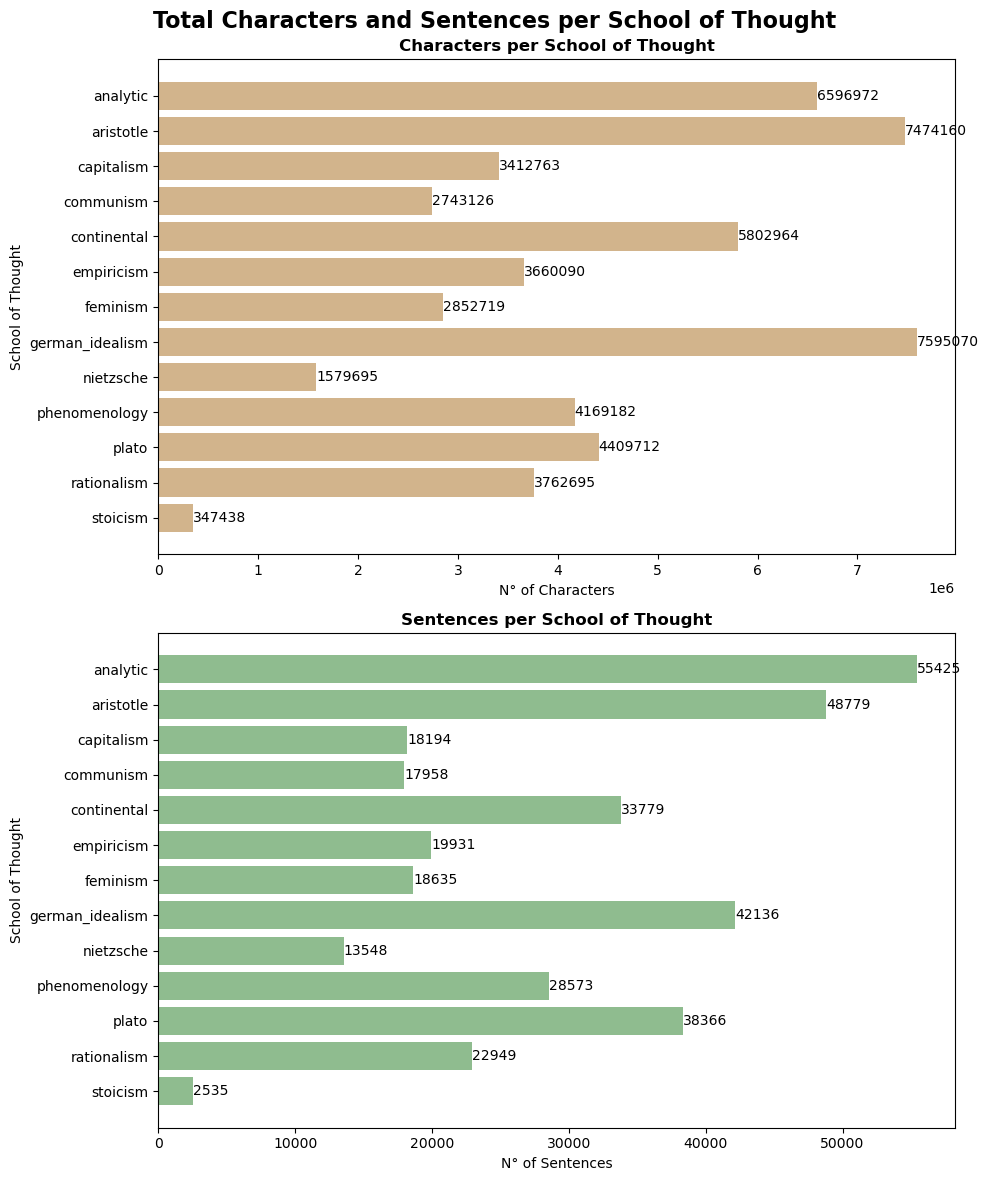

In [144]:
# Total amount of characters per school of thought
chars_per_school = df.groupby('school')['sentence_length'].sum().sort_index(ascending=False)
sentences_per_school = df['school'].value_counts().sort_index(ascending=False)

# Plotting the total amount of characters and sentences per school of thought
fig, ax = plt.subplots(2, figsize=(10, 12))
fig.suptitle('Total Characters and Sentences per School of Thought', fontweight='bold', fontsize=16)

# Plot for characters
barsC = ax[0].barh(chars_per_school.index, chars_per_school.values, color='tan')
ax[0].bar_label(barsC, fmt='%.0f')
ax[0].set_title('Characters per School of Thought',fontweight='bold')
ax[0].set_xlabel('N° of Characters')
ax[0].set_ylabel('School of Thought')

# Plot for sentences
barsS = ax[1].barh(sentences_per_school.index, sentences_per_school.values, color='darkseagreen')
ax[1].bar_label(barsS, fmt='%.0f')
ax[1].set_title('Sentences per School of Thought',fontweight='bold')
ax[1].set_xlabel('N° of Sentences')
ax[1].set_ylabel('School of Thought')

plt.tight_layout()
plt.show()

From these numbers we can already draw some considerations:
- The classes are very imbalanced (in terms of sentences, i.e. items to classify). The most populated classes are those relative to analytic philosophy, Aristotle, german idealism, plato
- The classes with the most sentences are not always those with the most number of characters. This leads to another interesting aspect of the analysis, which is *sentence length*

### Sentence length etc.

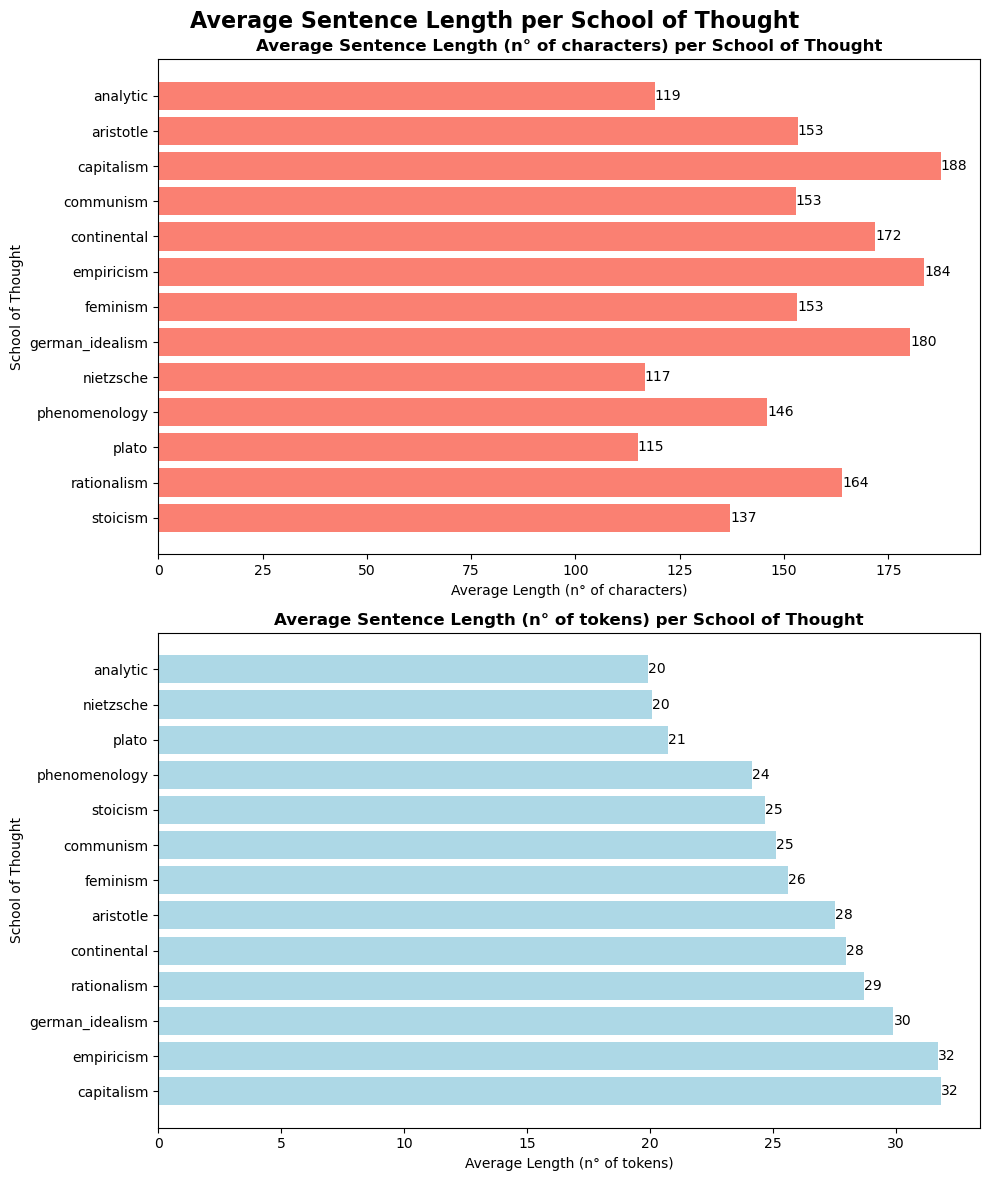

In [197]:
# all this mess because .csv saves lists as strings
sentence_l_df = df[['school','tokenized_txt']].copy()
sentence_l_df['tokenized_txt'] = sentence_l_df['tokenized_txt'].apply(lambda s: len([subs[1:-1] for subs in s[1:-1].split(', ')]))
sentence_l_df.groupby('school')['tokenized_txt'].mean().sort_values(ascending=False)

# Average sentence length per school of thought
fig, ax = plt.subplots(2, figsize=(10, 12))
fig.suptitle('Average Sentence Length per School of Thought', fontweight='bold', fontsize=16)

# Plot for characters
barsC = ax[0].barh(chars_per_school.index, chars_per_school.values / sentences_per_school.values, color='salmon')
ax[0].bar_label(barsC, fmt='%.0f')
ax[0].set_xlabel('Average Length (n° of characters)')
ax[0].set_ylabel('School of Thought')
ax[0].set_title('Average Sentence Length (n° of characters) per School of Thought', fontweight='bold')

# Plot for tokens
barsS = ax[1].barh(sentence_l_df.groupby('school')['tokenized_txt'].mean().sort_values(ascending=False).index, sentence_l_df.groupby('school')['tokenized_txt'].mean().sort_values(ascending=False).values, color='lightblue')
ax[1].bar_label(barsS, fmt='%.0f')
ax[1].set_xlabel('Average Length (n° of tokens)')
ax[1].set_ylabel('School of Thought')
ax[1].set_title('Average Sentence Length (n° of tokens) per School of Thought', fontweight='bold')


plt.tight_layout()
plt.show()

In [142]:
df['sentence_length'].describe()

count    360808.000000
mean        150.790964
std         104.822072
min          20.000000
25%          75.000000
50%         127.000000
75%         199.000000
max        2649.000000
Name: sentence_length, dtype: float64

Of course how long a sentence is in terms of number of characters doesn't tell much (maybe the german philosopher use those lengthy german words). The analysis should instead focus on the number of words/tokens in the sentence.

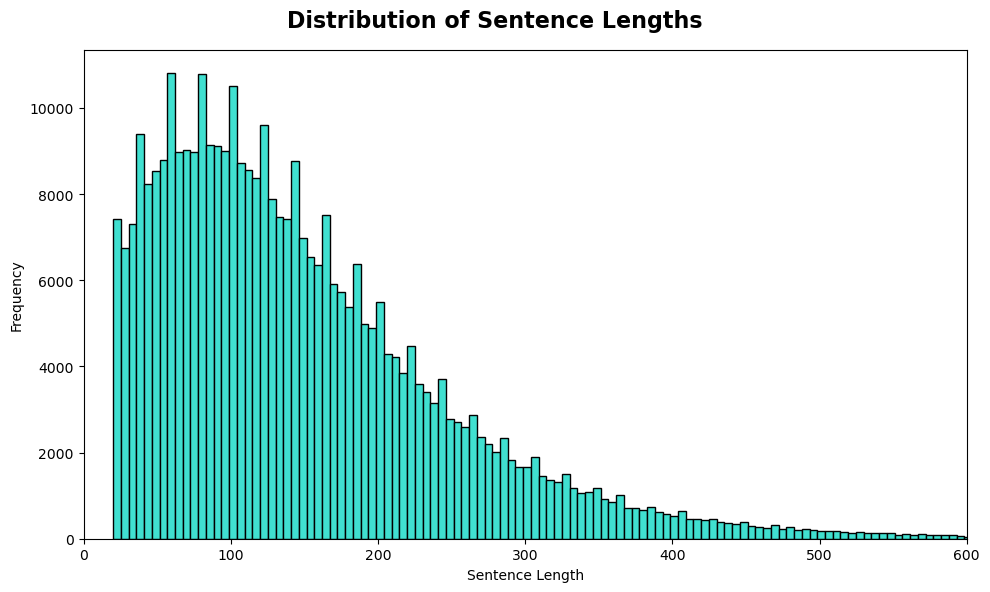

In [141]:
# distribution of sentence lengths
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Distribution of Sentence Lengths', fontweight='bold', fontsize=16)

ax.hist(df['sentence_length'], bins=500, color='turquoise', edgecolor='black')
ax.set_xlim(0, 600)
ax.set_xlabel('Sentence Length')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()